In [45]:
import pandas as pd

In [46]:
# This is our pilot study data set
filepath = "/data/databases/pilot_data.csv"

df = pd.read_csv(filepath)

In [47]:
df.shape[0], df.dropna().shape[0]

(44704, 2558)

In [83]:
import datetime

def striptime1(x):
    end_date = x
    try:
        return datetime.datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    except:
        # Some timestamps also have milliseconds
        return datetime.datetime.strptime(end_date[:-7], '%Y-%m-%d %H:%M:%S')

df['created'] = df['created_utc'].apply(striptime1)
df['ingested'] = df['ingested_utc'].apply(striptime1)

In [84]:
print("Total number of comments ingested by Crossmod during the experiment = ", df.shape[0])
print("Total number of comments Crossmod would have removed during the pilot study = ", df[df.crossmod_action == "remove"].shape[0])
print("% of comments Crossmod would have removed during the pilot study = ", 100.0 * df[df.crossmod_action == "remove"].shape[0]/df.shape[0], "%")
print("Total number of comments removed by moderators during the experiment = ", df[df.banned_by.notna()].shape[0])
print("% of comments removed by moderators during the experiment = ", 100.0 * df[df.banned_by.notna()].shape[0]/df.shape[0], "%")

Total number of comments ingested by Crossmod during the experiment =  44704
Total number of comments Crossmod would have removed during the pilot study =  657
% of comments Crossmod would have removed during the pilot study =  1.4696671438797424 %
Total number of comments removed by moderators during the experiment =  2558
% of comments removed by moderators during the experiment =  5.722083035075161 %


In [50]:
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('banned_by')['banned_by'].transform('count')
sub_df[['banned_by', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,banned_by,freq
2,AutoModerator,2319
1129,V2O5,46
4731,lughnasadh,35
4738,TransPlanetInjection,31
1334,1,27
6005,Yosarian2,26
1469,mind_bomber,23
13400,lord_stryker,20
1523,Sirisian,13
16293,Buck-Nasty,5


In [51]:
df.shape, df[df.agreement_score.notna()].shape

((44704, 13), (44704, 13))

# Automod removals

In [52]:
print("Total number of comments removed by AutoModerator during the experiment = ", df[df.banned_by == "AutoModerator"].shape[0])
print("% of removed comments that were removed by AutoModerator during the experiment = ", int(100.0 * df[df.banned_by == "AutoModerator"].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment = " , int(100.0*df[(df.crossmod_action == "report") & (df.banned_by == "AutoModerator")].shape[0]/df[(df.banned_by == "AutoModerator")].shape[0]), "%")

Total number of comments removed by AutoModerator during the experiment =  2319
% of removed comments that were removed by AutoModerator during the experiment =  90 %
Number of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  0
% of comments reported by Crossmod that were subsequently removed by AutoModerator during the experiment =  0 %


# Human moderator removals

In [53]:
print("Total number of comments removed by human moderators during the experiment = ", df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of removed comments that were removed by human mods during the experiment = ", int(100.0 * df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[df.banned_by.notna()].shape[0]), "%")
print("Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0])
print("% of comments reported by Crossmod that were subsequently removed by human mods during the experiment = ", int(100*df[(df.crossmod_action == "report") & (df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]/df[(df.banned_by != "AutoModerator") & (df.banned_by.notna())].shape[0]), "%")

Total number of comments removed by human moderators during the experiment =  239
% of removed comments that were removed by human mods during the experiment =  9 %
Number of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  0
% of comments reported by Crossmod that were subsequently removed by human mods during the experiment =  0 %


# Crossmod reports

In [54]:
print("Total number of comments that Crossmod would have removed during the pilot study = ", df[df.crossmod_action == "remove"].shape[0])
print("% comments ingested that Crossmod would have removed during the pilot study = ", int(100.0 * df[df.crossmod_action == "remove"].shape[0]/df.shape[0]), "%")
print("Number of comments that Crossmod would have removed during the pilot study that were subsequently removed = ", df[(df.crossmod_action == "remove") & (df.banned_by.notna())].shape[0])
print("% of comments that Crossmod would have removed during the pilot study that were subsequently removed = ", int(100.0 * df[(df.crossmod_action == "remove") & (df.banned_by.notna())].shape[0]/df[df.crossmod_action == "remove"].shape[0]), "%")

Total number of comments that Crossmod would have removed during the pilot study =  657
% comments ingested that Crossmod would have removed during the pilot study =  1 %
Number of comments that Crossmod would have removed during the pilot study that were subsequently removed =  169
% of comments that Crossmod would have removed during the pilot study that were subsequently removed =  25 %


# FALSE POSITIVES - 

In [55]:
for comment in df[(df.crossmod_action == "remove") & (df.banned_by.isna())].body[:100]:
    print(comment)
    print("----------------------")

=*(

Republicans suck. Democrats suck.  Flip flops on who sucks more, but they both suck.
----------------------
“Saving the planet is impossible, so it’s okay for me to make millions of dollars through capitalism. Whatever I do is green and makes me a better person than you.”

This hypocritical old white man can suck a fat donkey dick.
----------------------
Nevermind, just go back to sucking trumps dick.
----------------------
My oh my, you're a slow one, aren't you? Oh well. You can't fix stupid.
----------------------
Fuck yes. This.
----------------------
Don't need the nanny state in my life telling me not to suck my own dick, thanks
----------------------
> Lmao are you dumb? 

No, YOU are dumb. Abysmally dumb, because you can't understand the fact that ONE Amazon van makes deliveries to SEVERAL different homes. 

What you're saying is that mass transit is inefficient because a bus uses more fuel than a personal car. How stupid can you be...
----------------------
You'll get $5.

# FALSE NEGATIVES - 

In [56]:
for comment in df[(df.crossmod_action != "remove") & (df.banned_by.notna())].body[:100]:
    print(comment)
    print("----------------------")

Metaphorically burning your vote is better than not voting. If everyone who hated both would’ve wrote in Bernie or any other candidate, it would’ve at least sent a clear fuck you to Trump and Hillary. The democrats and republicans would try their hardest to sway the burned votes, possibly with new candidates on both sides. But if you don’t at least do that, they don’t care about you.

Voting makes them care. Contacting state/regional/local candidates and telling them which way you want them to vote on issues lets the larger politicians know how they should vote/support. They only care about voters.
----------------------
The only reason it looks like the temperature is increasing is because over the past 20 years 3,000 weather reporting stations that didn’t show rising temperatures were replaced with new weather reporting stations in dense urban locations and airports. Theses new locations were guaranteed to show rising temperatures due to the surrounding development.

Put simply they 

# Users who've been reported and removed multiple times

In [57]:
#author posting volumes
sub_df = df
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

,author,freq
3539,Koalaman21,115
1240,OliverSparrow,95
139,ThereOnceWasADonkey,92
251,Surur,86
248,VitriolicViolet,85
...,...,...
18130,greybaby55,1
18129,brookevdaaaaa,1
18125,Certainly-Not-A-Bot,1
18124,MeatRack,1


In [58]:
#author removal volumes
sub_df = df[df.banned_by.notna()]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
9148,Dues-Sol,9
1334,StartledWatermelon,9
3072,jstyler,9
2928,Ford456fgfd,8
5702,rsaralaya,6
...,...,...
8213,borkborkyupyup,1
8212,frydchiken333,1
8201,Smartsville,1
8197,dehehn,1


In [59]:
#author reported volumes
sub_df = df[df.crossmod_action == "remove"]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
4895,Go_easy,5
1491,NYYoungRepublicans,4
6485,Koalaman21,4
8453,ChartreusePickle,3
10579,mista_sir,3
...,...,...
10977,Troll_Inc,1
10960,Fascinax,1
10949,AgnosticStopSign,1
10853,Son0faRich,1


In [60]:
#author mis-reported volumes
sub_df = df[(df.crossmod_action == "remove") & (df.banned_by.notna())]
sub_df['freq'] = sub_df.groupby('author')['author'].transform('count')
sub_df[['author', 'freq']].drop_duplicates().sort_values(['freq'], ascending = [False])

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,author,freq
9394,killaknott27,3
9935,Dues-Sol,3
11847,ShedHero,2
42428,BuffaloRepublic,2
395,Mr_Bear_Loves_You,1
...,...,...
10746,eckstheory,1
10783,WeedMan420BonerGod,1
10808,Rotoscope8,1
10960,Fascinax,1


# Response time - 

In [61]:
df[df.banned_by != "AutoModerator"][["created_utc", "banned_at_utc", "banned_by"]].dropna()

,created_utc,banned_at_utc,banned_by
1129,2019-10-18 06:18:29,2019-10-18 18:39:12.000000,V2O5
1220,2019-10-18 07:32:29,2019-10-18 11:33:01.000000,SirT6
1334,2019-10-18 08:45:14,2019-10-22 21:26:45.000000,1
1340,2019-10-18 08:49:44,2019-10-22 21:26:44.000000,1
1360,2019-10-18 08:57:26,2019-10-22 21:26:44.000000,1
...,...,...,...
44035,2019-10-16 15:29:30,2019-10-16 19:46:35.000000,lughnasadh
44063,2019-10-16 15:34:28,2019-10-16 19:46:35.000000,lughnasadh
44096,2019-10-16 15:41:35,2019-10-16 19:46:35.000000,lughnasadh
44110,2019-10-16 15:43:56,2019-10-16 19:46:35.000000,lughnasadh


In [62]:
import datetime

sub_df = df.dropna()
created = []
banned = []
misses = 0

def striptime1(x):
    end_date = x
    try:
        return datetime.datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    except:
        return datetime.datetime.strptime(end_date[:-7], '%Y-%m-%d %H:%M:%S')

sub_df['created'] = sub_df['created_utc'].apply(striptime1)
sub_df['banned'] = sub_df['banned_at_utc'].apply(striptime1)

sub_df['response_time'] = sub_df['banned'] - sub_df['created']

seconds = []
for x in sub_df['response_time']:
    seconds.append(x.total_seconds())
    
sub_df['response_time'] = seconds

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a 

In [63]:
sub_df = sub_df[sub_df.banned_by != "AutoModerator"]
sub_df.response_time.mean(), sub_df.response_time.median(), sub_df.response_time.max(), sub_df.response_time.min()

(122712.85355648535, 31556.0, 746946.0, 14400.0)

In [64]:
20554/3600

5.709444444444444

In [65]:
sub_df.shape[0]

239

In [66]:
df.shape[0], df[df['agreement_score'] >= 0.9].shape[0], df[df['agreement_score'] >= 0.7].shape[0]

(44704, 162, 2006)

In [67]:
df[(df['crossmod_action'] == "remove") & (df.agreement_score < 0.7)].shape[0]

293

In [68]:
df[(df['crossmod_action'] == "remove") & (df.agreement_score < 0.85)]['created_utc'].max()

'2019-10-24 13:11:19'

In [69]:
sub_df.shape[0]

239

# Plots

In [70]:
import matplotlib.pyplot as plt
import seaborn

# Plot Parameters

# Agreement Score Parameters: Choose starting and ending agreement score thresholds, and how many intervals between them.
agreement_score_start = 50
agreement_score_end = 100
delta = 5
agreement_scores = [i * 0.01 for i in range(agreement_score_start, agreement_score_end, delta)]

# Finding the starting and ending ingested_utc in the dataset
min_date = df['ingested'].min()
max_date = df['ingested'].max()

## Agreement Score vs. Number of Comments

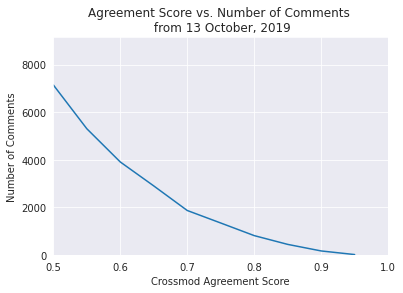

In [71]:
#Agreement Scores vs. Number of Comments
def comments_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold)].shape[0]    
number_of_comments = [comments_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_comments) + 2000)
##############################################################
plt.show()

## Agreement Score vs. Number of True Positives

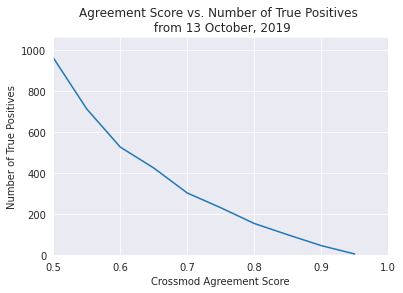

In [72]:
#Agreement Scores vs. Number of True Positives
def true_positives_at_threshold(agreement_score_threshold):
    return df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
number_of_true_positives = [true_positives_at_threshold(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'number_of_true_positives'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: number_of_true_positives},columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Number of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0, max(number_of_true_positives) + 100)
##############################################################
plt.show()

## Agreement Score vs. Ratio of True Positives to Total Comments at Threshold

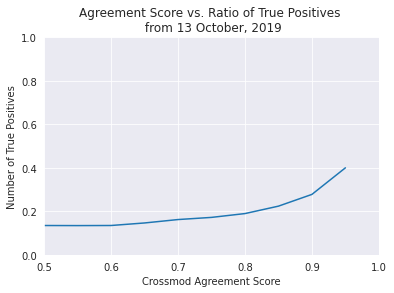

In [73]:
#Agreement Scores vs. Ratio of True Positives
def ratio_of_true_positives(agreement_score_threshold):
    true_positives = df[(df.agreement_score >= agreement_score_threshold) & (df.banned_by.notnull())].shape[0] 
    total_at_threshold = df[(df.agreement_score >= agreement_score_threshold)].shape[0]
    return true_positives / total_at_threshold
ratios = [ratio_of_true_positives(i) for i in agreement_scores]
x_axis = 'agreement_score'
y_axis = 'ratios'
line_plot_df = pd.DataFrame({x_axis: agreement_scores, y_axis: ratios}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Agreement Score vs. Ratio of True Positives \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel('Crossmod Agreement Score')
line_plot.set_ylabel('Number of True Positives')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(agreement_score_start*0.01, agreement_score_end*0.01)
plt.ylim(0*0.01, 100*0.01)
##############################################################
plt.show()

In [74]:
##############################################################
# Change bucket size (in days) for smoother rates
##############################################################
bucket_size = 1
##############################################################
def normalize_rate(raw_metric, daily_comments):
    assert len(raw_metric) == len(daily_comments)
    normalized_metric = []
    for (i, metric) in enumerate(raw_metric):
        if daily_comments[i] == 0:
            normalized_metric.append(0)
        else:
            normalized_metric.append(metric/daily_comments[i])
    return normalized_metric
##############################################################
# Dates based on bucket size
##############################################################
dates = [i for i in range(int((max_date - min_date).days/bucket_size))]
dates = [ i * bucket_size for i in dates]

## Total Number of Comments Posted on Subreddit

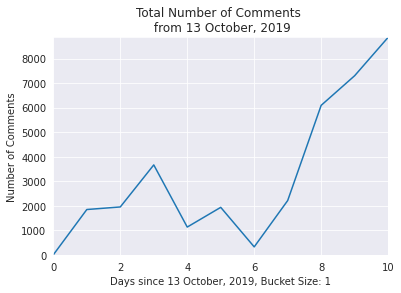

In [75]:
# Total # of Comments
def comments_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date)].shape[0]
number_of_comments = [0] + [comments_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Comments \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Comments')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_comments))
##############################################################
plt.show()

In [76]:
for i in range(0, len(ratios)):
    print("Threshold >= , ", agreement_scores[i] ," => True positive rate = ", ratios[i])

Threshold >= ,  0.5  => True positive rate =  0.13469616353962474
Threshold >= ,  0.55  => True positive rate =  0.13431428032446707
Threshold >= ,  0.6  => True positive rate =  0.134768127081732
Threshold >= ,  0.65  => True positive rate =  0.1464088397790055
Threshold >= ,  0.7000000000000001  => True positive rate =  0.16210413311862587
Threshold >= ,  0.75  => True positive rate =  0.17202692595362754
Threshold >= ,  0.8  => True positive rate =  0.1895910780669145
Threshold >= ,  0.85  => True positive rate =  0.2237442922374429
Threshold >= ,  0.9  => True positive rate =  0.2777777777777778
Threshold >= ,  0.9500000000000001  => True positive rate =  0.4


## Total Number of Moderator Removals

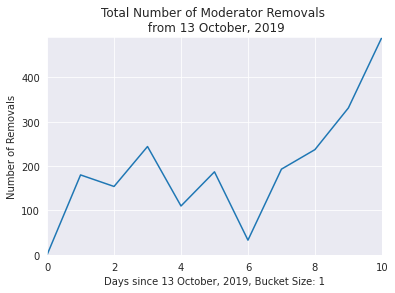

In [77]:
# Total Number of Moderator Removals
def comments_moderated_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.banned_by.notnull())].shape[0]
number_of_moderated_comments = [0] + [comments_moderated_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_moderated_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_moderated_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Moderator Removals \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Removals')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_moderated_comments))
##############################################################
plt.show()

## Rate of Moderator Removals

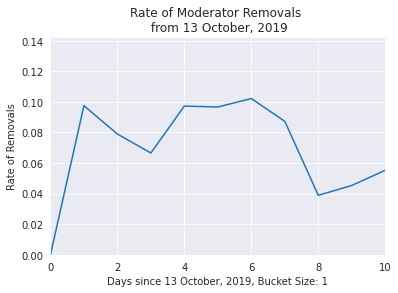

In [78]:
# Rate of Moderator Removals
rate_of_moderated_comments = normalize_rate(number_of_moderated_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_moderated_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_moderated_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Moderator Removals \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Removals')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(rate_of_moderated_comments)+0.04)
##############################################################
plt.show()

## Total Number of Crossmod Reports

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


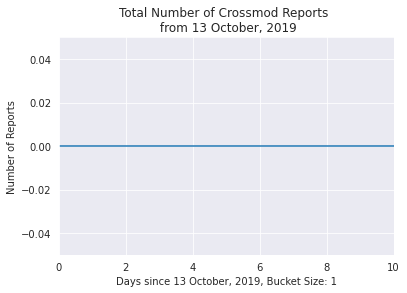

In [79]:
# Total Number of Crossmod Reports
def comments_reported_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report")].shape[0]
##############################################################
number_of_reported_comments = [0] + [comments_reported_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Crossmod Reports \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
plt.show()

## Rate of Crossmod Reports

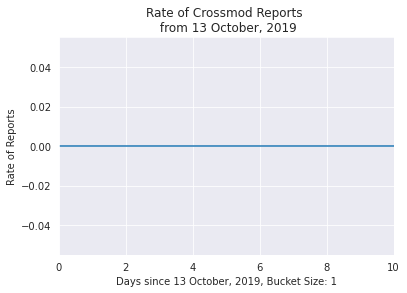

In [80]:
# Rate of Crossmod Reports
rate_of_reported_comments = normalize_rate(number_of_reported_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_reported_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_reported_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Crossmod Reports \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
##############################################################
plt.show()

## Total Number of Report Removal Sequences

/data/home/crossmod-dev/crossmod-retrain/env/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.


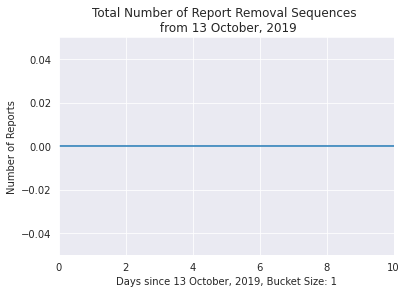

In [81]:
# Total Number of Report Removal Sequences
def comments_reported_and_removed_between_dates(start_date, end_date):
    return df[(df.ingested >= start_date) & (df.ingested < end_date) & (df.crossmod_action == "report") & (df.banned_by.notnull())].shape[0]
##############################################################
number_of_reported_and_removed_comments = [0] + [comments_reported_and_removed_between_dates(min_date + datetime.timedelta(days = dates[i - 1]),
                                                   min_date + datetime.timedelta(days = dates[i])) 
                            for i in range(1, len(dates))]
x_axis = 'days'
y_axis = 'number_of_reported_and_removed_comments'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: number_of_reported_and_removed_comments}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Total Number of Report Removal Sequences \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Number of Reports')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
plt.ylim(0, max(number_of_reported_comments))
##############################################################
plt.show()

## Rate of Report Removal Sequences

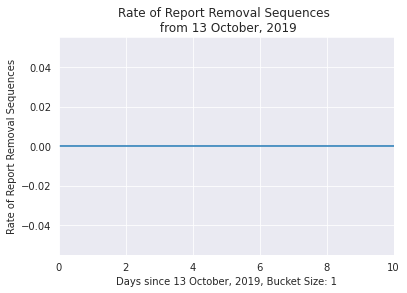

In [82]:
# Rate of Report Removal Sequences
rate_of_report_removal_sequences = normalize_rate(number_of_reported_and_removed_comments, number_of_comments)
x_axis = 'days'
y_axis = 'rate_of_report_removal_sequences'
line_plot_df = pd.DataFrame({x_axis: dates, y_axis: rate_of_report_removal_sequences}, columns = [x_axis, y_axis])
seaborn.set_style("darkgrid")
line_plot = seaborn.lineplot(x = x_axis, y = y_axis, data = line_plot_df)
line_plot.set_title(f'Rate of Report Removal Sequences \n from {min_date.strftime("%d %B, %Y")}')
line_plot.set_xlabel(f'Days since {min_date.strftime("%d %B, %Y")}, Bucket Size: {bucket_size}')
line_plot.set_ylabel(f'Rate of Report Removal Sequences')
##############################################################
# Set scale for x and y axis
##############################################################
plt.xlim(0, max(dates))
##############################################################
plt.show()